In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

# Set Seaborn style
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
# Set font to Times New Roman for all plots
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'stix'  # Use STIX fonts for math expressions


def plot_err_multi(data_file_paths, titles=None, y_min=None, y_max=None):
    if not isinstance(data_file_paths, list) or len(data_file_paths) != 3:
        raise ValueError("data_file_paths should be a list of 3 paths.")

    fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True, gridspec_kw={'wspace': 0.3} )

    # Load and process each file
    for idx, (data_file_path, ax) in enumerate(zip(data_file_paths, axes)):
        if not os.path.exists(data_file_path):
            raise FileNotFoundError(f"Data file not found at: {data_file_path}")

        # Load the data
        print(f"Loading data from: {data_file_path}")
        data = torch.load(data_file_path)

        steps = data['steps']
        steps = [s+2 for s in steps]
        avg_comp_errors = data['avg_comp_errors']
        avg_total_errors = data['avg_total_errors']

        plot_steps_comp = [s for s, e in zip(steps, avg_comp_errors) if e is not None]
        plot_errors_comp = [e for e in avg_comp_errors if e is not None]

        plot_steps_total = [s for s, e in zip(steps, avg_total_errors) if e is not None]
        plot_errors_total = [e for e in avg_total_errors if e is not None]

        # Prepare dataframe for this subplot
        df = pd.DataFrame({
            'Steps': plot_steps_comp + plot_steps_total,
            'Error': plot_errors_comp + plot_errors_total,
            'Type': ['Instantaneous Compression Error'] * len(plot_errors_comp) + ['Cumulative Deviation from Ground Truth'] * len(plot_errors_total)
        })

        sns.lineplot(data=df, x='Steps', y='Error', hue='Type', 
                     style='Type', ax=ax, markers=False, dashes=False, linewidth=2)

        # ax.set_title(titles[idx] if titles else f"Plot {idx+1}")
        ax.set_xlabel('Steps Taken')
        if idx == 0:
            ax.set_ylabel('Frobenius Norm')
        else:
            ax.set_ylabel('')

        ax.grid(True, alpha=0.3)
        ax.set_xlim(left=0)
        if y_min is not None or y_max is not None:
            ax.set_ylim(bottom=y_min, top=y_max)

    # Merge legends
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2)
    for ax in axes:
        ax.get_legend().remove()
    plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space for legend
    plt.show()



Loading data from: avg_err_dump/average_error_vs_steps_naive.pt
Loading data from: avg_err_dump/average_error_vs_steps_residual.pt
Loading data from: avg_err_dump/average_error_vs_steps_ef.pt


/tmp/ipykernel_228209/2950580804.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space for legend


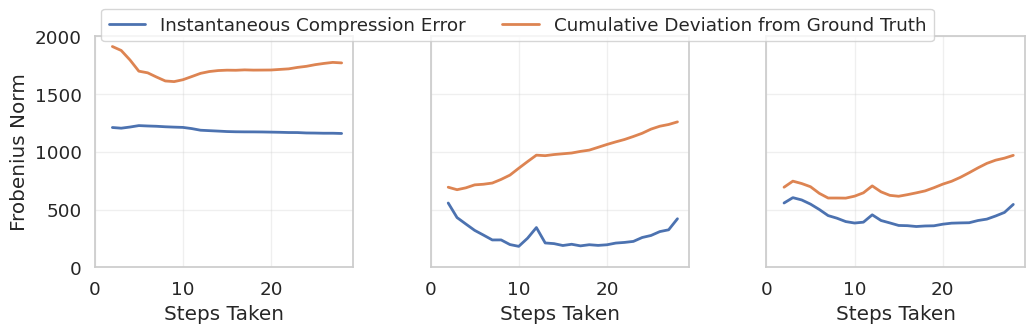

In [2]:
# Example usage:
plot_err_multi(
    [
        "avg_err_dump/average_error_vs_steps_naive.pt",
        "avg_err_dump/average_error_vs_steps_residual.pt",
        "avg_err_dump/average_error_vs_steps_ef.pt",
    ],
    titles=["Naive Compression", "Residual Compression", "Residual Compression with Error Feedback"],
    y_min=0, y_max=2000
)
